To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first 4 images in the training dataset.

Using TensorFlow backend.


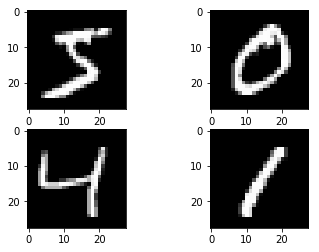

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plot

Using TensorFlow backend.


In [22]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [23]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train_cnv = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test_cnv = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(num_pixels)

784


In [24]:
# normalize inputs from 0-255 to 0-1
# what does this exactly do? What is the type of X_train and X_test
X_train_cnv = X_train_cnv / 255
X_test_cnv = X_test_cnv / 255

In [25]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Note that now tensorboard is added here
After this run, you can run "tensorboard --logdir /Users/khan/Documents/deeplearning/log" to see that in action:
http://0.0.0.0:6006

We can also embed an image in the notebook (https://stackoverflow.com/questions/32370281/how-to-include-image-or-picture-in-jupyter-notebook)

In [55]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='/Users/khan/Documents/deeplearning/log', histogram_freq=0,
                          write_graph=True, write_images=False)

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train_cnv, y_train, validation_data=(X_test_cnv, y_test), epochs=10, batch_size=200, verbose=2, callbacks=[tensorboard])
# Final evaluation of the model
scores = model.evaluate(X_test_cnv, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2830 - acc: 0.9199 - val_loss: 0.1404 - val_acc: 0.9570
Epoch 2/10
3s - loss: 0.1104 - acc: 0.9674 - val_loss: 0.0952 - val_acc: 0.9713
Epoch 3/10
3s - loss: 0.0706 - acc: 0.9797 - val_loss: 0.0799 - val_acc: 0.9768
Epoch 4/10
3s - loss: 0.0500 - acc: 0.9855 - val_loss: 0.0698 - val_acc: 0.9777
Epoch 5/10
3s - loss: 0.0357 - acc: 0.9896 - val_loss: 0.0631 - val_acc: 0.9804
Epoch 6/10
3s - loss: 0.0260 - acc: 0.9932 - val_loss: 0.0666 - val_acc: 0.9777
Epoch 7/10
3s - loss: 0.0200 - acc: 0.9949 - val_loss: 0.0591 - val_acc: 0.9807
Epoch 8/10
3s - loss: 0.0152 - acc: 0.9965 - val_loss: 0.0617 - val_acc: 0.9811
Epoch 9/10
3s - loss: 0.0114 - acc: 0.9975 - val_loss: 0.0611 - val_acc: 0.9812
Epoch 10/10
3s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0608 - val_acc: 0.9818
Baseline Error: 1.82%


#### Now let's try to load a digit image and see how it works

In [52]:
from PIL import Image, ImageFilter
import PIL.ImageOps 
from numpy import array

class ScaleUtils():
    def __init__(self, p, h=28, w=28):
        self.im = Image.open(p)
        self.size = (h,w)
    def toGrey(self):
        self.im = self.im.convert("L")
        return self
    def resize(self):
        self.im = self.im.resize(self.size)
        return self
    def invert(self):
        self.im = PIL.ImageOps.invert(self.im)
        return self
    def getArray(self):
        return array(self.im)
    def getImage(self):
        return self.im
    def run(self):
        return self.toGrey().resize().getArray()
    
# this particular one requires invert
ScaleUtils("/Users/khan/Desktop/test_8_digit.png").toGrey().resize().invert().getImage().save("output.jpg", "JPEG")

### Predict using one from training set

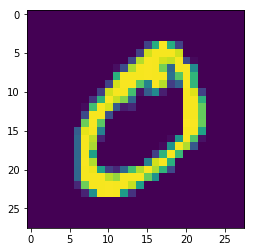

1/1 [==============================] - 0s
[0]


In [46]:
plt.imshow(X_train[1])
plt.show()

input = X_train_cnv[1]
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

In [ ]:
from scipy.misc import imread
import matplotlib.pyplot as plt

im = imread("output.jpg")
plt.imshow(im)
plt.show()

input = im
X = input.reshape(1,784)
pr = model.predict_classes(X)
print (pr)

#### test_5_digit.png